# __Problem Statement :__

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

# Aim :

__To build and compare several customer churn prediction models.__

In [1]:
# Importing the first required libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

And rest of the libraries will be imported according to our requirements as we proceed further into the project.

In [2]:
#To display all the columns at once

pd.set_option('display.max_columns',None)

In [3]:
# Getting the dataset

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From here we can observe that this dataset is a combination of both categorical and numerical data.

The target "Churn" is categorical, hence we will use categorical models in this project.

# Exploratory Data Analysis :

In [4]:
# Checking shape of the dataset

df.shape

(7043, 21)

There are 7043 rows and 21 columns in our dataset.

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Checking datatype of the dataset

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Most of the features are object datatype.

In [7]:
# Getting more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no null values in the dataset.

And memory used by the dataset is 1.1+ MB.

In [11]:
#Checking for unique values in each feature

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

__We can drop "customerID" column as it only contains unique ID's for customers, which won't help in our machine learning models.__

In [12]:
df.drop(['customerID'],axis=1,inplace=True)

In [13]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


_Successfully dropped._

In [14]:
# To check the value count of eaach feature 

for i in df.columns:
        print(df[i].value_counts())
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

Male      3555
Female    3488
Name: gender, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     3641
Yes    3402
Name: Partner, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     4933
Yes    2110
Name: Dependents, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Yes    6361
No      682
Name: PhoneService, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


In [47]:
# Converting TotalCharges from object to float type data

df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [48]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

_Successfully converted._

In [52]:
# Checking for null values 

df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values only in TotalCharges, which is less and can be dropped easily.

In [53]:
df.dropna(inplace=True)

In [54]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

All null values dropped.

We can also visualize and check :

In [56]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

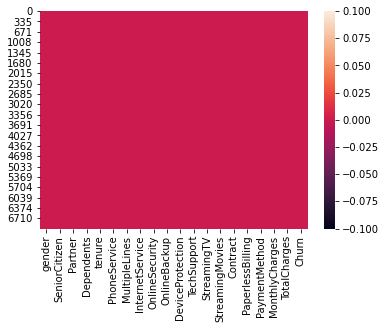

In [57]:
sns.heatmap(df.isnull())

# Exploring output variable :

In [15]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [58]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

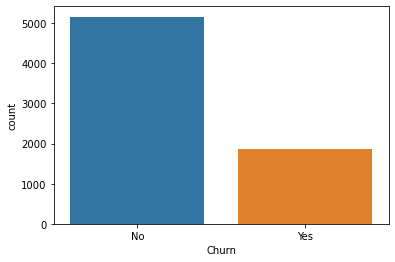

In [59]:
sns.countplot(x='Churn', data=df)

__<font color=orange>Here we can observe highly imbalanced data in our target. This will be balanced using  SMOTE technique in the later part of the project.</font>__

# Univariate Analysis :

In [60]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='gender', ylabel='count'>

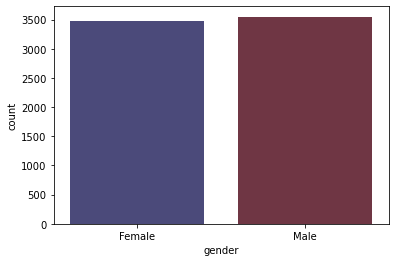

In [61]:
sns.countplot(x='gender', data=df, palette='icefire')

Almost equal numbers of male and female in the customers population.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

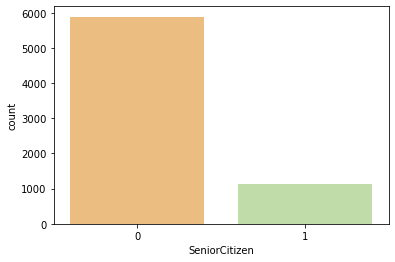

In [62]:
sns.countplot(x='SeniorCitizen',data=df,palette='Spectral')

Maximum customers are young citizens.

<AxesSubplot:xlabel='Partner', ylabel='count'>

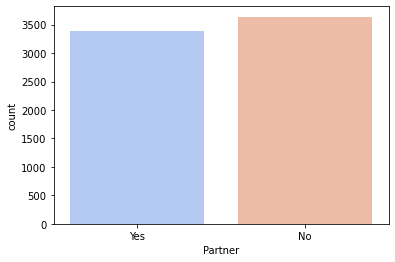

In [63]:
sns.countplot(x='Partner',data=df,palette='coolwarm')

Mostly customers do not have any partner.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

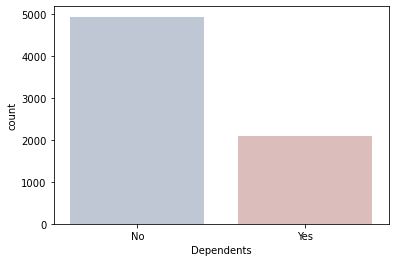

In [64]:
sns.countplot(x='Dependents',data=df,palette='vlag')

Most of the customers do not have any dependents on them.

<AxesSubplot:xlabel='tenure', ylabel='Density'>

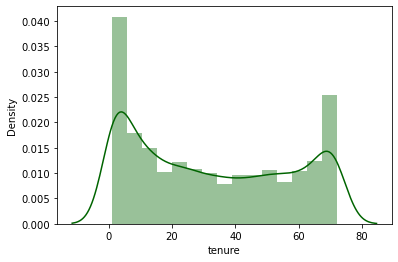

In [65]:
sns.distplot(df['tenure'], color='darkgreen')

The tenure for a churning customer indicates the number of months that they spent as a subscriber. Hence here the maximum tenure range is 0 to 15 only.

And no skewness is visible here.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

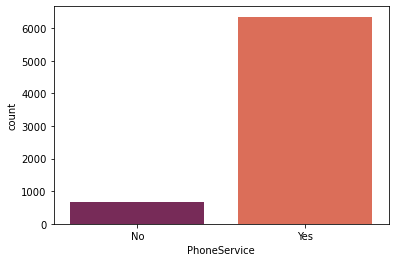

In [66]:
sns.countplot(x='PhoneService',data=df,palette='rocket')

Maximum customers had a phone service and very less customers didnt have any.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

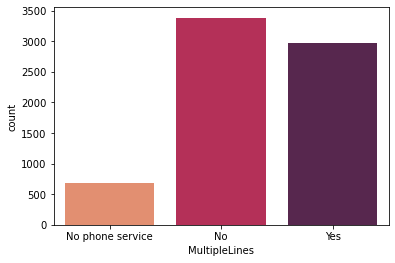

In [67]:
sns.countplot(x="MultipleLines",data=df,palette="rocket_r")

<AxesSubplot:xlabel='InternetService', ylabel='count'>

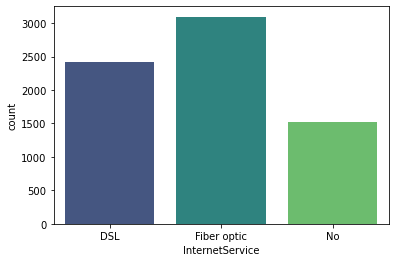

In [68]:
sns.countplot(x="InternetService",data=df,palette="viridis")

Customers have an internet service mostly through fiber optic and DSL, and less customers don not have an internet service.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

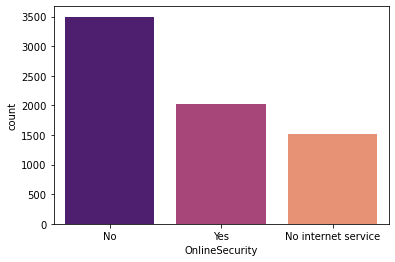

In [69]:
sns.countplot(x="OnlineSecurity",data=df,palette="magma")

Most of the customers do not have any online security.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

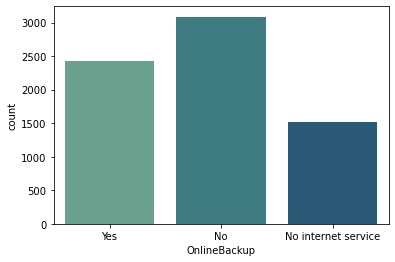

In [70]:
sns.countplot(x="OnlineBackup",data=df,palette="crest")

Most of the customers do not have any online backup.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

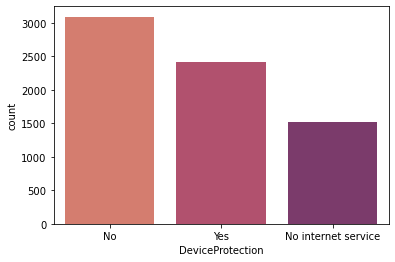

In [71]:
sns.countplot(x="DeviceProtection",data=df,palette="flare")

Most of the customers do not have any device protection.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

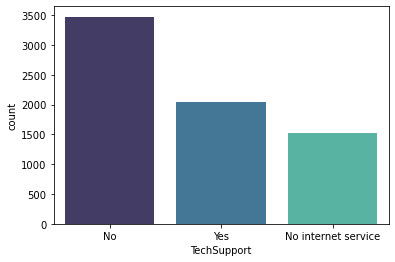

In [72]:
sns.countplot(x="TechSupport",data=df,palette="mako")

Most of the customers do not have any technical support.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

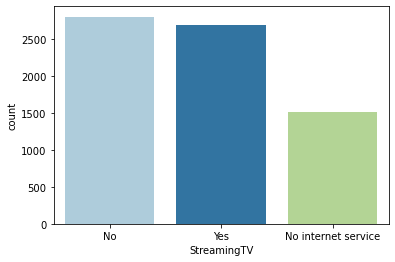

In [73]:
sns.countplot(x="StreamingTV",data=df,palette="Paired")

Some customers have streaming TV and some do not. Not much difference can be observed.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

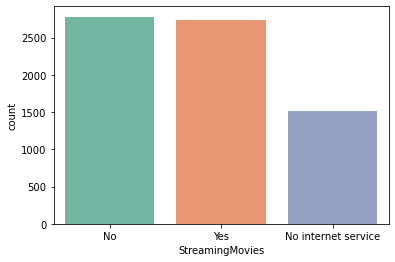

In [74]:
sns.countplot(x="StreamingMovies",data=df,palette="Set2")

<AxesSubplot:xlabel='Contract', ylabel='count'>

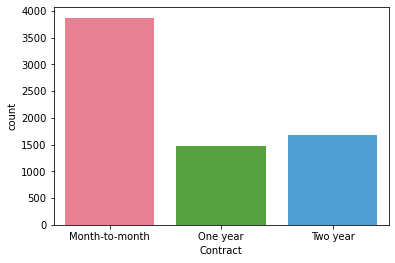

In [75]:
sns.countplot(x="Contract",data=df,palette="husl")

Maximum customers are having month to month contract with the organization.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

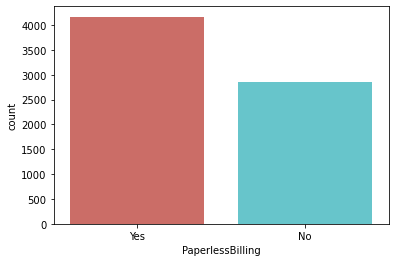

In [76]:
sns.countplot(x="PaperlessBilling",data=df,palette="hls")

Most customers prefer paper less billing, like online transactions.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

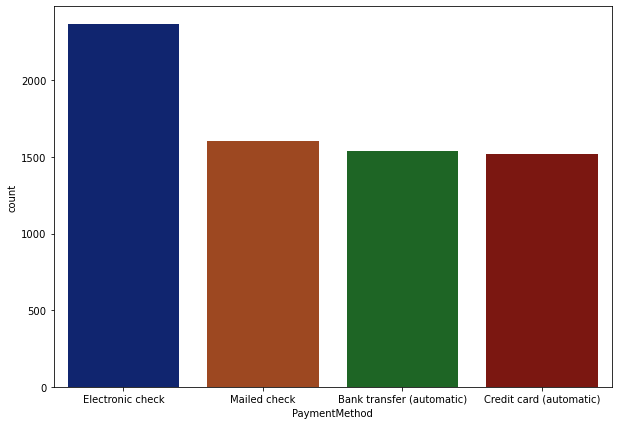

In [77]:
plt.figure(figsize=(10,7))
sns.countplot(x="PaymentMethod",data=df,palette="dark")

Maximum customers use electronic check for making payments.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

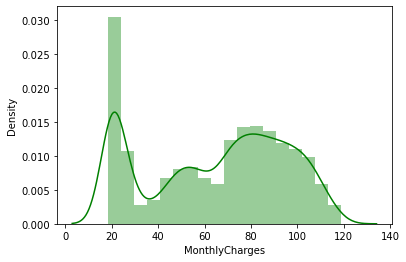

In [79]:
sns.distplot(df['MonthlyCharges'], color='green')

No skewness is visible here.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

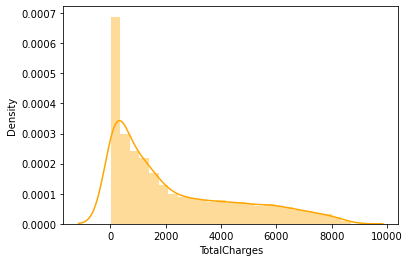

In [80]:
sns.distplot(df['TotalCharges'], color='orange')

This feature is right skewed.

# Bivariate Analysis :

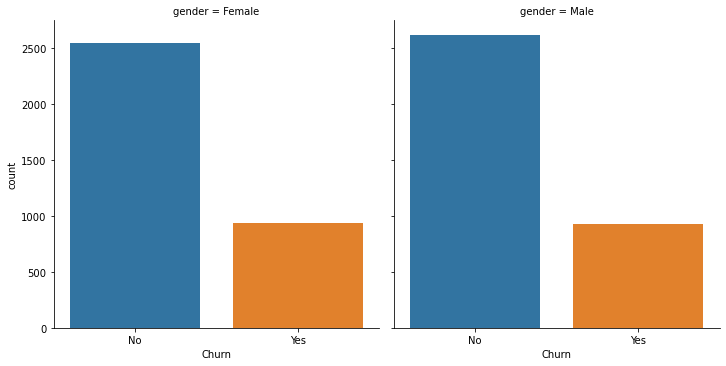

In [88]:
sns.catplot(x='Churn',col='gender',data=df,kind="count")

Both male and female customers have equal levels of Churn.

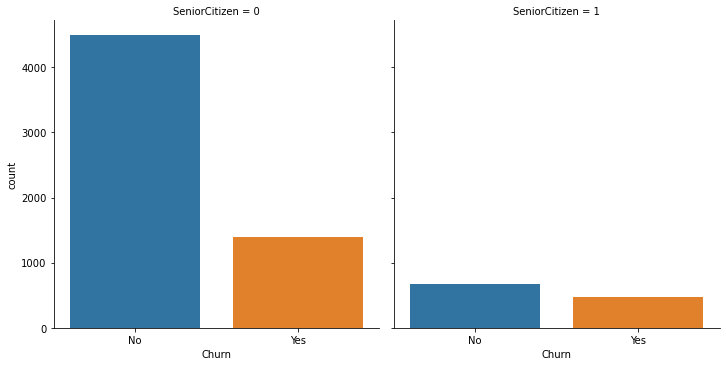

In [89]:
sns.catplot(x='Churn',col='SeniorCitizen',data=df,kind="count")

In case of both senior and young citizen, there is less chances of churn, that is, they will not leave the company.

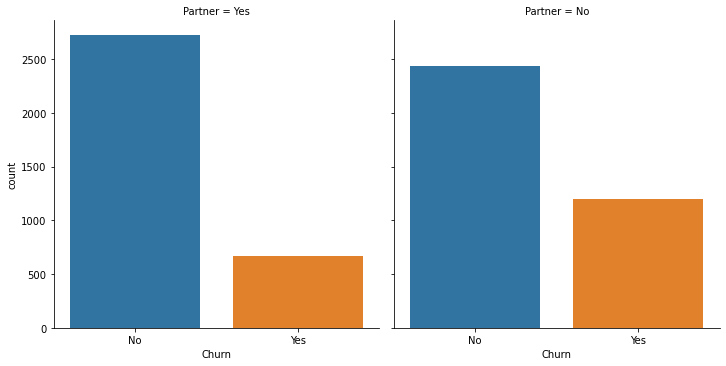

In [90]:
sns.catplot(x='Churn',col='Partner',data=df,kind="count")

No significant relevance is observed between Partner and churn.

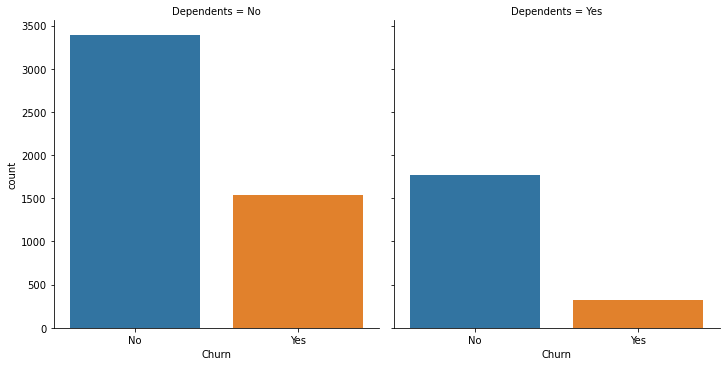

In [91]:
sns.catplot(x='Churn',col='Dependents',data=df,kind="count")

Customers without any dependents has more churn rate, as compared to customers with dependents.

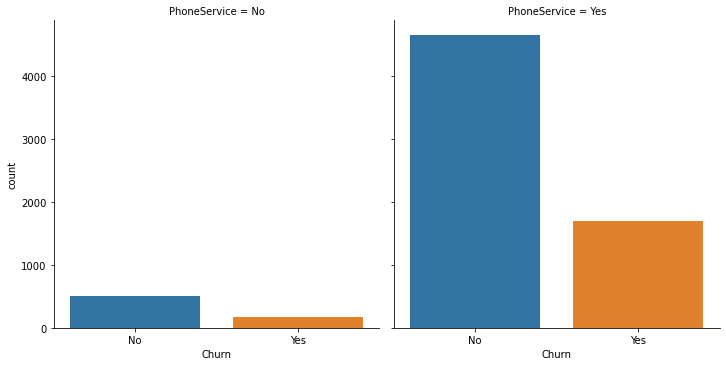

In [98]:
sns.catplot(x='Churn',col='PhoneService',data=df,kind="count")

Customers which has phone service are having more churn rate.

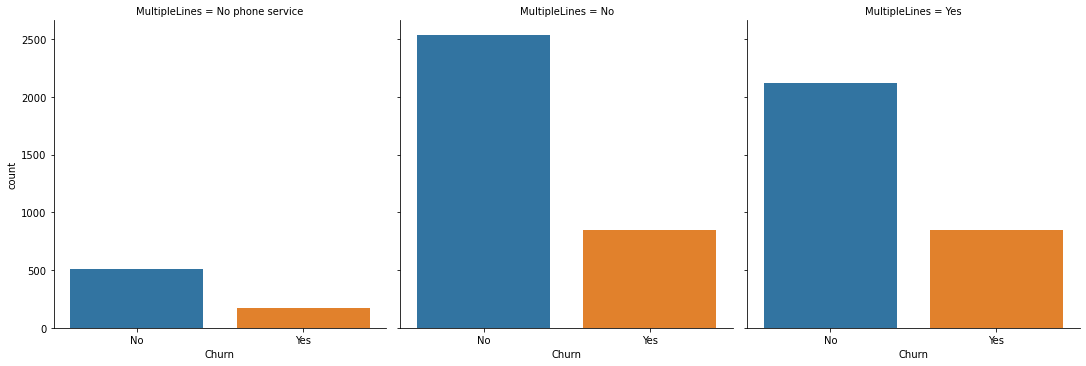

In [99]:
sns.catplot(x='Churn',col='MultipleLines',data=df,kind="count")

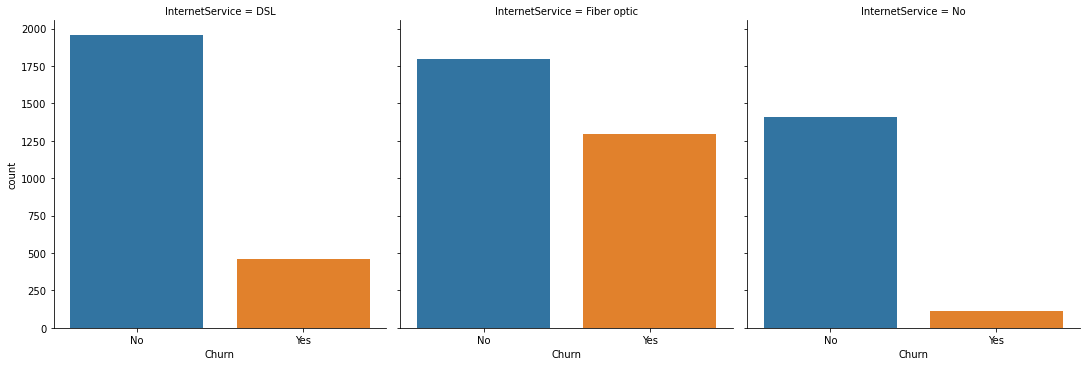

In [100]:
sns.catplot(x='Churn',col='InternetService',data=df,kind="count")

Customers who are having internet service through fiber optics, are having high rate of churn.

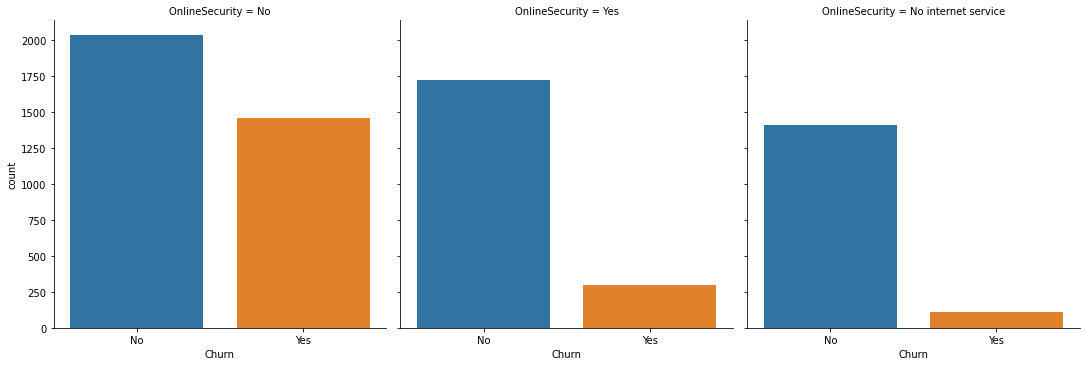

In [101]:
sns.catplot(x='Churn',col='OnlineSecurity',data=df,kind="count")

Customers with no online security are having high rate of churn.

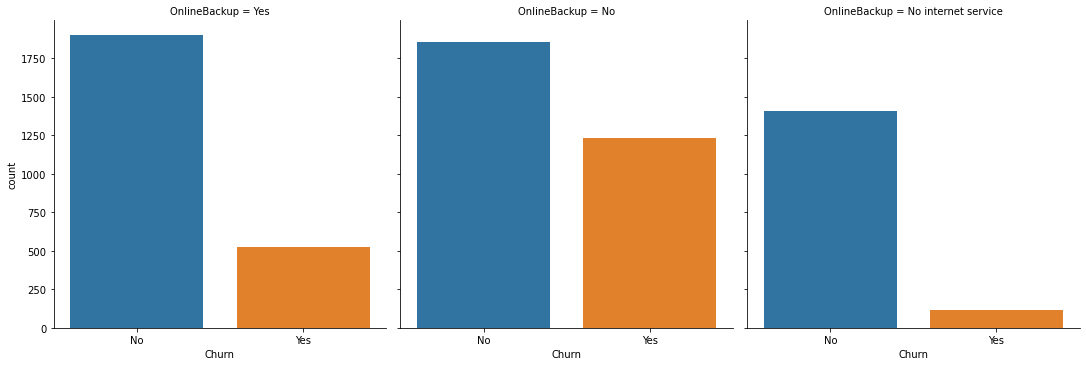

In [102]:
sns.catplot(x='Churn',col='OnlineBackup',data=df,kind="count")

Customers with no online backup has more churn rate.

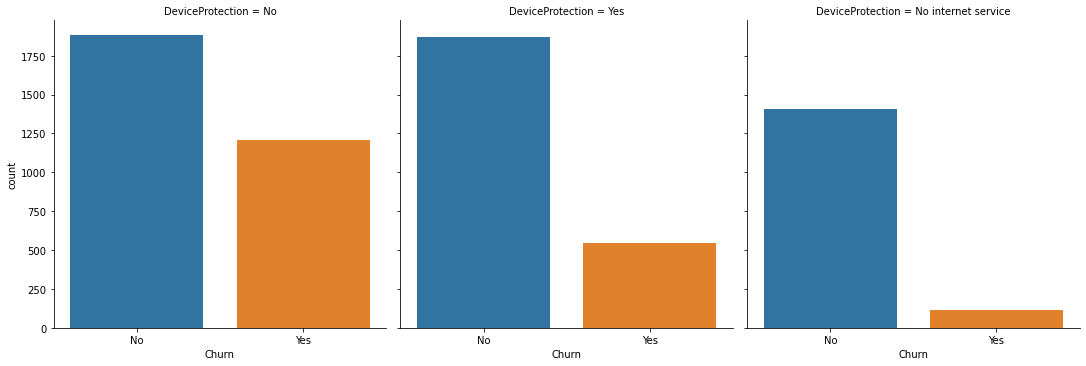

In [104]:
sns.catplot(x='Churn',col='DeviceProtection',data=df,kind="count")

Customers with no device protection has more churn rate.

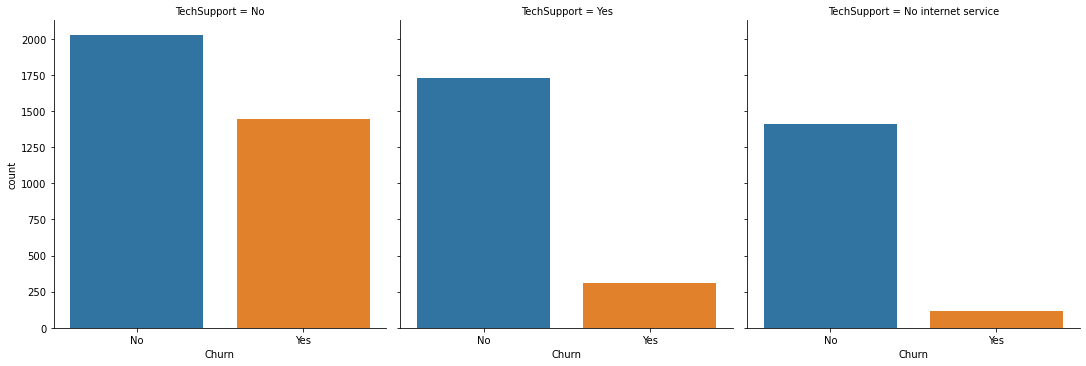

In [105]:
sns.catplot(x='Churn',col='TechSupport',data=df,kind="count")

Customers with no technical support has more churn rate.

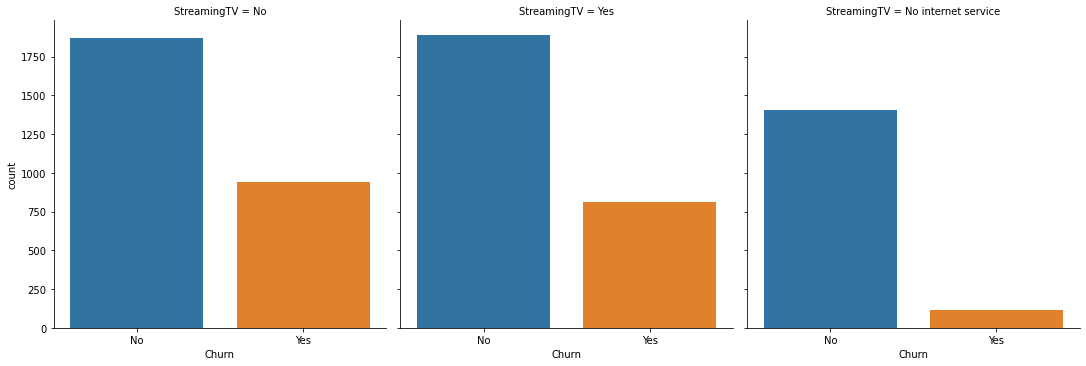

In [106]:
sns.catplot(x='Churn',col='StreamingTV',data=df,kind="count")

No specific relation can be observed between tv streaming and churn.

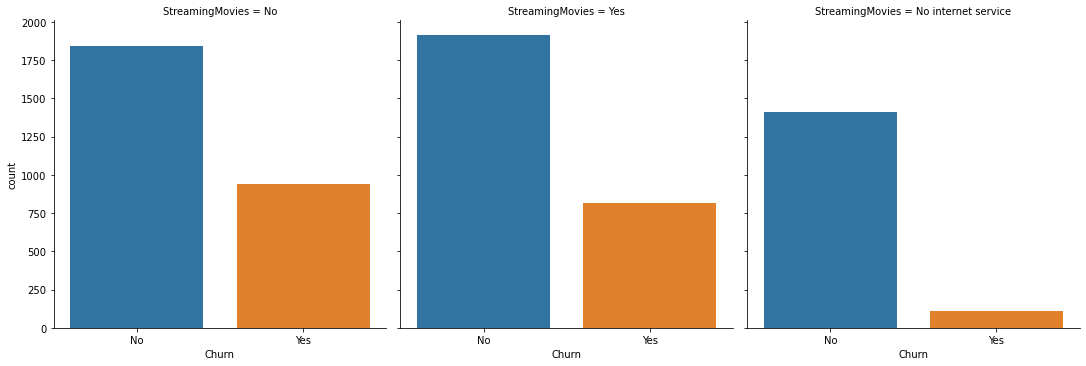

In [107]:
sns.catplot(x='Churn',col='StreamingMovies',data=df,kind="count")

No specific relation can be observed between movie streaming and churn.

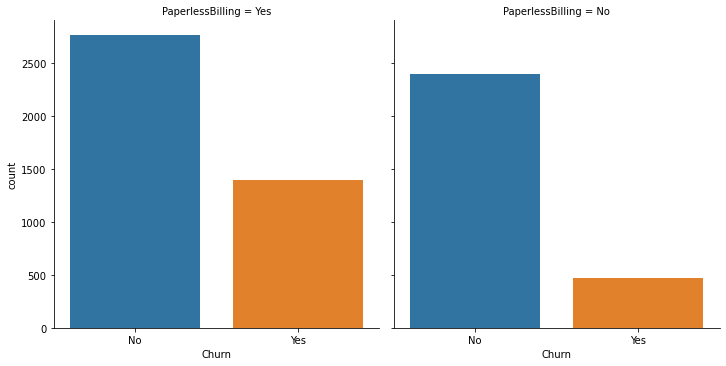

In [108]:
sns.catplot(x='Churn',col='PaperlessBilling',data=df,kind="count")

Most customers who prefer paperless billing, have high churn rate.

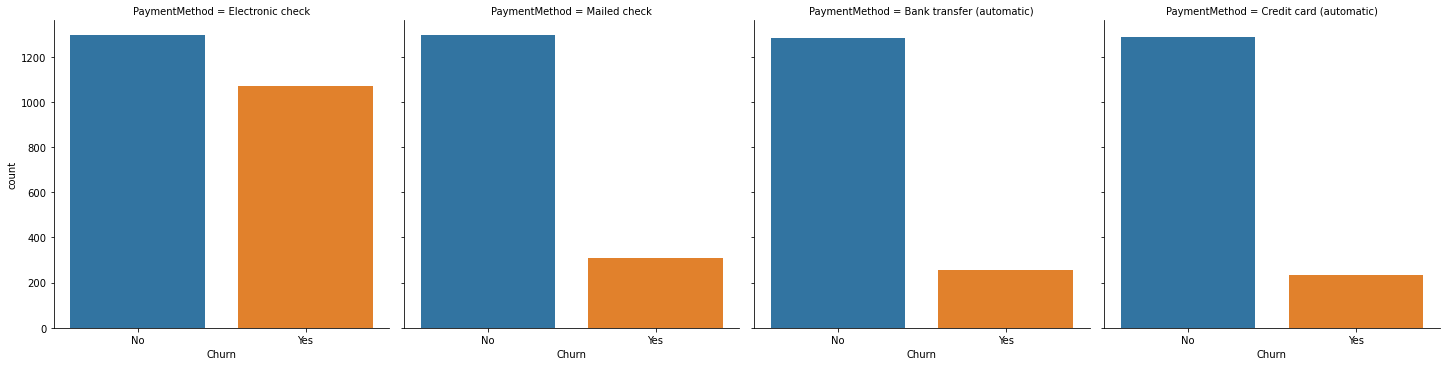

In [109]:
sns.catplot(x='Churn',col='PaymentMethod',data=df,kind="count")

Most customers who prefer electronic check, have high churn rate

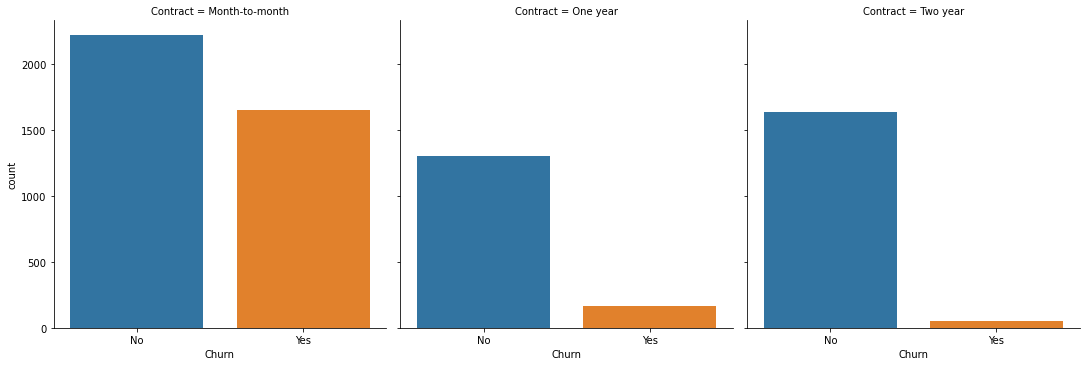

In [110]:
sns.catplot(x='Churn',col='Contract',data=df,kind="count")

Customer who have month to month contract with the company has high churn rate.

# Multivariate Analysis :

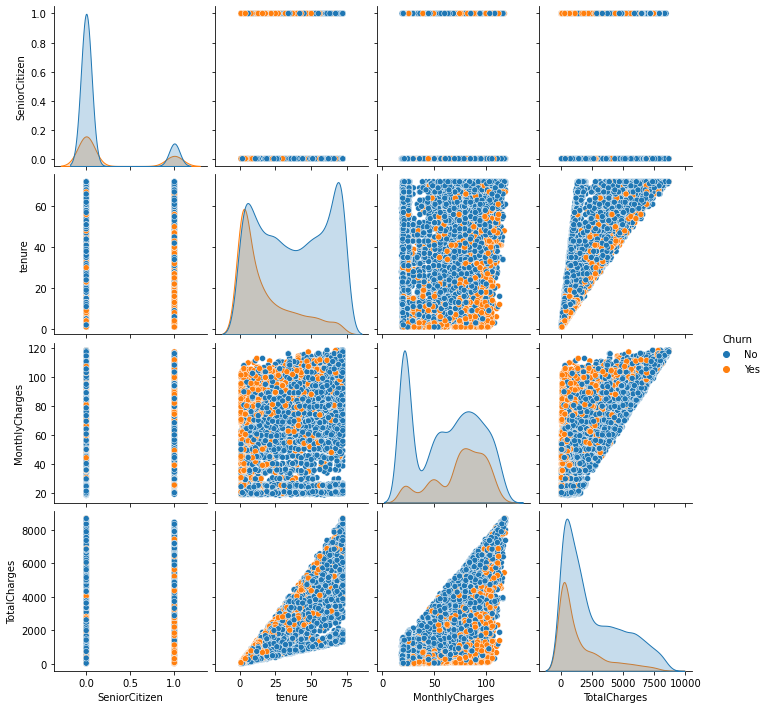

In [119]:
sns.pairplot(df,hue="Churn")

# Label Encoder :

In [121]:
from sklearn import preprocessing

In [122]:
le = preprocessing.LabelEncoder()

In [124]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])

In [125]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


_So all the features are converted into numeric form._

In [126]:
# Checking various factors of the dataset

df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.00,0.0000,1.000,1.0000,1.00
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
Partner,7032.0,0.482509,0.499729,0.00,0.0000,0.000,1.0000,1.00
Dependents,7032.0,0.298493,0.457629,0.00,0.0000,0.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
PhoneService,7032.0,0.903299,0.295571,0.00,1.0000,1.000,1.0000,1.00
MultipleLines,7032.0,0.940557,0.948627,0.00,0.0000,1.000,2.0000,2.00
InternetService,7032.0,0.872582,0.737271,0.00,0.0000,1.000,1.0000,2.00
OnlineSecurity,7032.0,0.789249,0.859962,0.00,0.0000,1.000,2.0000,2.00
OnlineBackup,7032.0,0.905859,0.880394,0.00,0.0000,1.000,2.0000,2.00


__Observation :__
    
    1. Tenure and Total charges has much difference between their mean and median value, which indicates presence of skewed data.
    2. Huge difference between 75th percentile and max value in columns Tenure, MonthlyCharges, TotalCharges, which indicates presence of outliers.

In [127]:
# Checking Skewness of the dataset

df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

_The data is fairly symmetrical if the skewness is between +/-0.5._

_If the skewness is between -1 and – 0.5 or between 0.5 and 1, then there is a little decent skewness._

_If the skewness is less than -1 or greater than 1, the data are highly skewed._

__Observation :__
    
    PhoneService is highly skewed and needs to be handled.

In [128]:
import numpy as np

In [131]:
df['PhoneService']=np.cbrt(df['PhoneService'])

In [132]:
df.skew()

gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.961642
Churn               1.060622
dtype: float64

No improvement can be seen here, we can check later on after power transformation.

# Detecting Outliers :

gender                 AxesSubplot(0.125,0.749828;0.168478x0.130172)
SeniorCitizen       AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Partner             AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Dependents          AxesSubplot(0.731522,0.749828;0.168478x0.130172)
tenure                 AxesSubplot(0.125,0.593621;0.168478x0.130172)
PhoneService        AxesSubplot(0.327174,0.593621;0.168478x0.130172)
MultipleLines       AxesSubplot(0.529348,0.593621;0.168478x0.130172)
InternetService     AxesSubplot(0.731522,0.593621;0.168478x0.130172)
OnlineSecurity         AxesSubplot(0.125,0.437414;0.168478x0.130172)
OnlineBackup        AxesSubplot(0.327174,0.437414;0.168478x0.130172)
DeviceProtection    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
TechSupport         AxesSubplot(0.731522,0.437414;0.168478x0.130172)
StreamingTV            AxesSubplot(0.125,0.281207;0.168478x0.130172)
StreamingMovies     AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Contract            AxesSubplot(0.

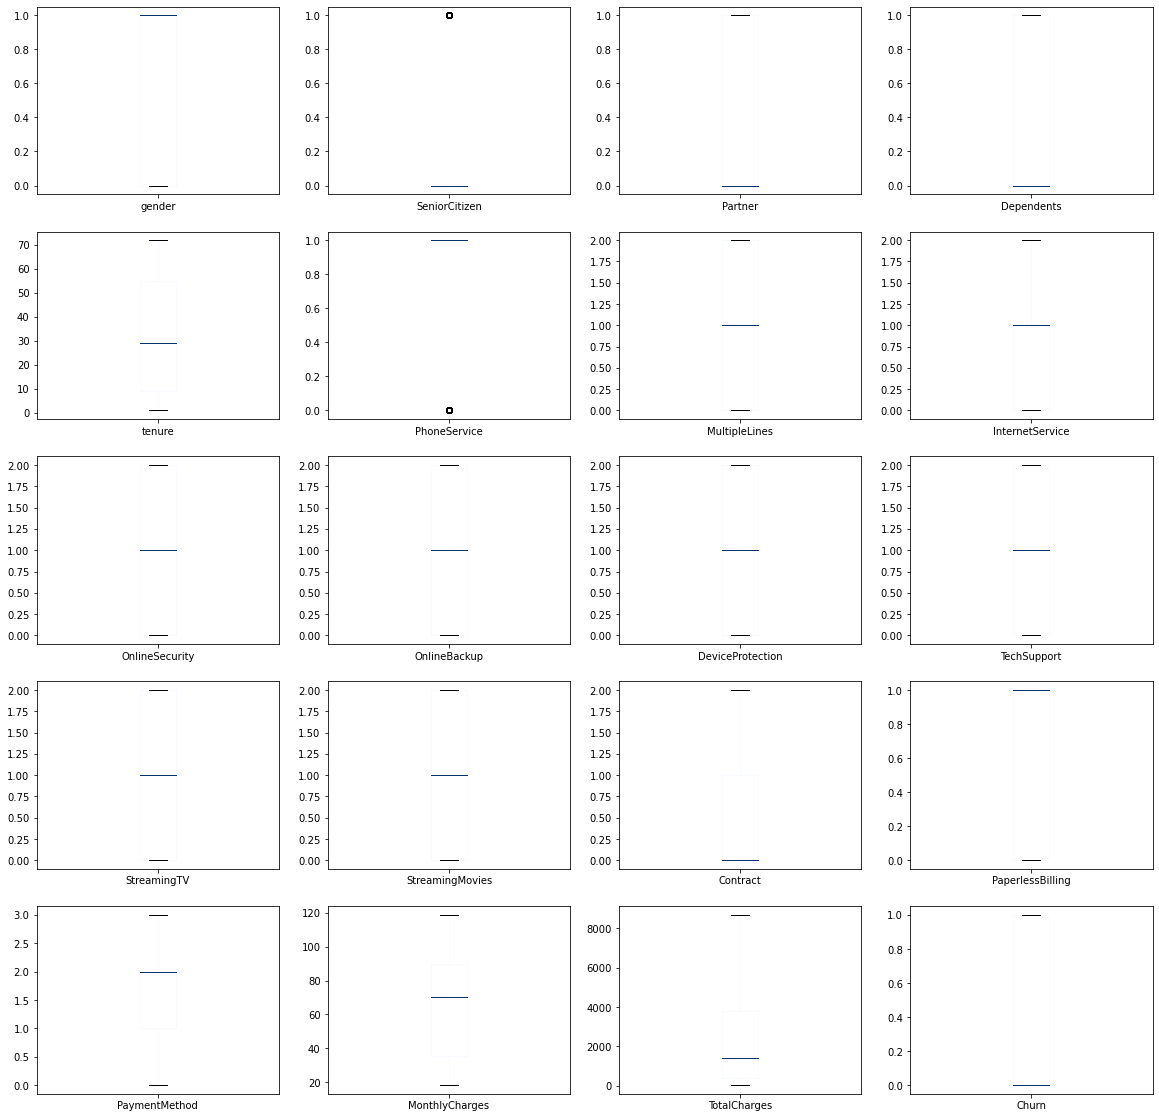

In [137]:
df.plot(kind='box', subplots=True, layout=(5,4), figsize=(20,20), colormap='Blues')

Very less outliers can be observed. And can be easily removed.

In [138]:
# Importing required zscore library

from scipy.stats import zscore

In [139]:
z=np.abs(zscore(df))

In [140]:
threshold=3

In [141]:
df_new=df[(z<3).all(axis=1)] 

In [142]:
print('Shape of original dataframe', df.shape)

Shape of original dataframe (7032, 20)


In [143]:
print('Shape of dataframe after outliers removal', df_new.shape)

Shape of dataframe after outliers removal (6352, 20)


In [144]:
# Data loss percentage

loss=((7032-6352)/7032)*100
print('Data loss percentage ',loss)

Data loss percentage  9.670079635949943


Here we can see the difference between our original df shape and df_new shape, and the percentage of data loss. Much of the outliers are removed with 9% and we can't afford to lose more data and will proceed further with these values.

In [145]:
df=df_new
df.shape

(6352, 20)

# Classification models :

In [148]:
# Data part

x=df.iloc[:,:19]
x.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,1,0,0,0,34,1.0,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5


In [149]:
# Target

y=df.Churn
y.head()

1    0
2    1
4    1
5    1
6    0
Name: Churn, dtype: int32

# Variance Inflation Factor :
__<font color=orange>It helps us to eliminate multi co-linearity.</font>__

In [150]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [152]:
vif_calc()

    VIF Factor          Features
0     1.002417            gender
1     1.152538     SeniorCitizen
2     1.469993           Partner
3     1.384584        Dependents
4     7.948918            tenure
5    38.181385      PhoneService
6     1.416545     MultipleLines
7     1.579843   InternetService
8     1.276361    OnlineSecurity
9     1.236881      OnlineBackup
10    1.299454  DeviceProtection
11    1.330141       TechSupport
12    1.447654       StreamingTV
13    1.450375   StreamingMovies
14    2.539165          Contract
15    1.214584  PaperlessBilling
16    1.183088     PaymentMethod
17    5.036151    MonthlyCharges
18   11.265072      TotalCharges


Now, here we will find the highest values, which are "TotalCharges", "PhoneService".

Now we need to check the individual impact on the target[Churn], from these attributes.

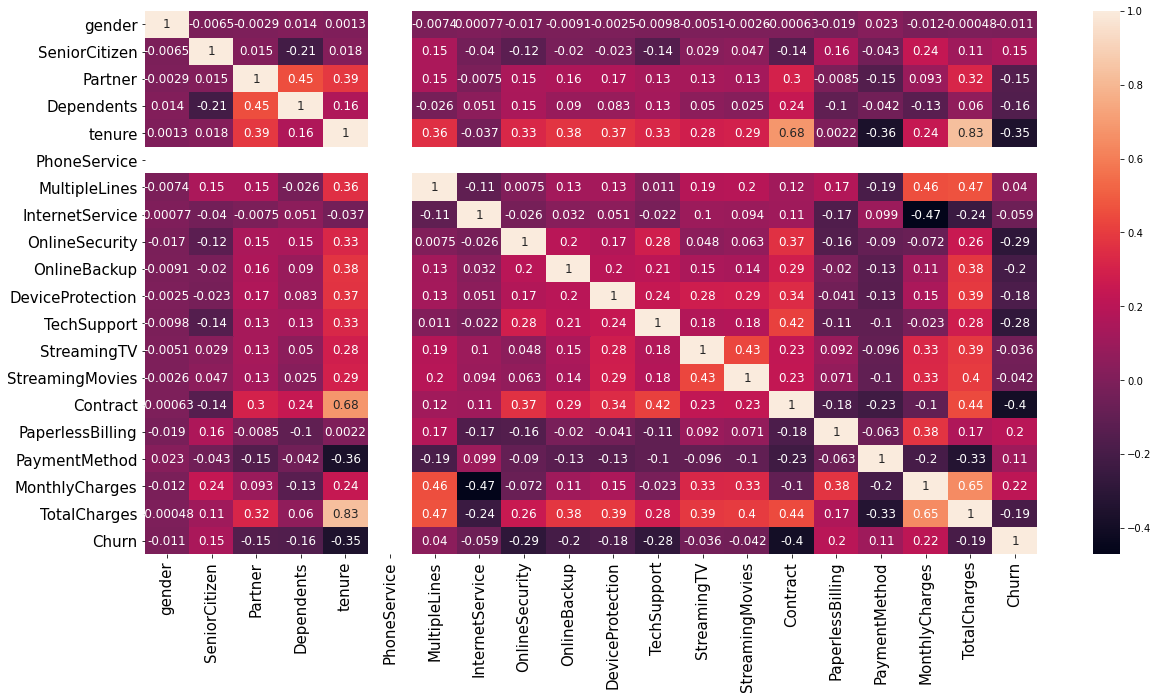

In [153]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={'size':12})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Hence PhoneServices and tenure can be dropped.

In [154]:
df.drop(['PhoneService','tenure'],axis=1,inplace=True)

In [155]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

_Successfully dropped._

# Feature Scaling :
__<font color=orange>To transform the dataset into same format, so that we have a uniform dataset.</font>__

In [156]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [163]:
x=df.iloc[:,:17]
y=df.Churn

In [165]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.993097,-0.441965,-0.971440,-0.652054,-0.936223,-1.35076,1.436984,-1.051821,1.262685,-0.934359,-1.147992,-1.152706,0.372688,-1.213093,1.337677,-0.338074,-0.205102
1,0.993097,-0.441965,-0.971440,-0.652054,-0.936223,-1.35076,1.436984,1.252824,-1.044067,-0.934359,-1.147992,-1.152706,-0.827168,0.824339,1.337677,-0.439927,-0.970074
2,-1.006951,-0.441965,-0.971440,-0.652054,-0.936223,0.04755,-0.928937,-1.051821,-1.044067,-0.934359,-1.147992,-1.152706,-0.827168,0.824339,0.401377,0.113693,-0.951394
3,-1.006951,-0.441965,-0.971440,-0.652054,1.068121,0.04755,-0.928937,-1.051821,1.262685,-0.934359,1.145104,1.140431,-0.827168,0.824339,0.401377,1.064868,-0.664167
4,0.993097,-0.441965,-0.971440,1.533616,1.068121,0.04755,-0.928937,1.252824,-1.044067,-0.934359,1.145104,-1.152706,-0.827168,0.824339,-0.534924,0.718240,-0.179378
5,-1.006951,-0.441965,1.029399,-0.652054,1.068121,0.04755,-0.928937,-1.051821,1.262685,1.427380,1.145104,1.140431,-0.827168,0.824339,0.401377,1.234075,0.291561
6,0.993097,-0.441965,-0.971440,1.533616,-0.936223,-1.35076,1.436984,1.252824,-1.044067,-0.934359,-1.147992,-1.152706,0.372688,-1.213093,-1.471224,-0.364358,0.481328
7,0.993097,-0.441965,1.029399,1.533616,-0.936223,-1.35076,1.436984,-1.051821,-1.044067,-0.934359,-1.147992,-1.152706,-0.827168,0.824339,1.337677,-0.568064,-0.764246
8,0.993097,-0.441965,-0.971440,-0.652054,-0.936223,1.44586,0.254024,0.100502,0.109309,0.246510,-0.001444,-0.006137,1.572545,-1.213093,-0.534924,-1.586593,-0.876178
9,0.993097,-0.441965,1.029399,-0.652054,1.068121,0.04755,-0.928937,-1.051821,1.262685,-0.934359,1.145104,1.140431,0.372688,-1.213093,-0.534924,1.087867,1.423142


# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [158]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [166]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.993097,-0.441965,-0.97144,-0.652054,-0.936223,-1.358425,1.333498,-1.074737,1.227543,-0.978897,-1.147608,-1.151061,0.702135,-1.213093,1.403078,-0.484997,0.110894
1,0.993097,-0.441965,-0.97144,-0.652054,-0.936223,-1.358425,1.333498,1.220999,-1.068653,-0.978897,-1.147608,-1.151061,-0.877896,0.824339,1.403078,-0.575110,-1.228122
2,-1.006951,-0.441965,-0.97144,-0.652054,-0.936223,0.056198,-0.974273,-1.074737,-1.068653,-0.978897,-1.147608,-1.151061,-0.877896,0.824339,0.347948,-0.042456,-1.187874
3,-1.006951,-0.441965,-0.97144,-0.652054,1.068121,0.056198,-0.974273,-1.074737,1.227543,-0.978897,1.145486,1.142043,-0.877896,0.824339,0.347948,1.146361,-0.616542
4,0.993097,-0.441965,-0.97144,1.533616,1.068121,0.056198,-0.974273,1.220999,-1.068653,-0.978897,1.145486,-1.151061,-0.877896,0.824339,-0.583178,0.676939,0.144875


In [167]:
# Rechecking VIF

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [168]:
vif_calc()

    VIF Factor          Features
0     1.002290            gender
1     1.151965     SeniorCitizen
2     1.461797           Partner
3     1.383475        Dependents
4     1.413543     MultipleLines
5     1.425468   InternetService
6     1.302026    OnlineSecurity
7     1.220093      OnlineBackup
8     1.295148  DeviceProtection
9     1.354297       TechSupport
10    1.481139       StreamingTV
11    1.484709   StreamingMovies
12    2.169149          Contract
13    1.213425  PaperlessBilling
14    1.164974     PaymentMethod
15    3.665848    MonthlyCharges
16    3.941054      TotalCharges


So after scaling and power transforamtion, VIF factors are all balanced.

# SMOTE :
To balance the categorical imbalance in target.

In [169]:
from imblearn.over_sampling import SMOTE

In [170]:
sm = SMOTE()
x, y = sm.fit_resample(x,y)

In [171]:
y.value_counts()

0    4653
1    4653
Name: Churn, dtype: int64

Hence the target is balanced, and now we can proceed with machine learning models.

# Machine Learning Models :
Here we have a classification case, hence we'll go with Logistic Regression and various other classification models.

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score 

# Spliting dataframe and finding best random state :

In [174]:
lr=LogisticRegression()

In [175]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
# predicting the x_train so that we can cross check how well the model is performing    
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test, pred_test)*100,1):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuracy_score is:-", accuracy_score(y_train, pred_train)*100)
        print("Testing accuracy_score is:-", accuracy_score(y_test, pred_test)*100, '\n\n')

At random state 11  The model performs very well
At random_state:- 11
Training accuracy_score is:- 77.6195593766792
Testing accuracy_score is:- 77.55102040816327 


At random state 63  The model performs very well
At random_state:- 63
Training accuracy_score is:- 77.6195593766792
Testing accuracy_score is:- 77.6047261009667 


At random state 107  The model performs very well
At random_state:- 107
Training accuracy_score is:- 77.59269210102096
Testing accuracy_score is:- 77.6047261009667 


At random state 141  The model performs very well
At random_state:- 141
Training accuracy_score is:- 77.70016120365395
Testing accuracy_score is:- 77.71213748657357 


At random state 227  The model performs very well
At random_state:- 227
Training accuracy_score is:- 77.5120902740462
Testing accuracy_score is:- 77.49731471535983 


At random state 238  The model performs very well
At random_state:- 238
Training accuracy_score is:- 77.57925846319183
Testing accuracy_score is:- 77.6047261009667 


At

So, we have found some of the good random state values with the help of Logistic Regression, and will select the one which gives highest accuracy.

141 random state with accuracy score 77.7

# Required Evaluation Metrices :

In [176]:
# Spliting the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=141)
# Here 20% will be used for testing purpose and rest 80% for training purpose.

In [178]:
# First we'll create list of all the classification models to be used

models=[LogisticRegression(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        SVC(), # default kernel='rbf'
        SVC(kernel='poly')]

In [179]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.7771213748657357
[[698 238]
 [177 749]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       936
           1       0.76      0.81      0.78       926

    accuracy                           0.78      1862
   macro avg       0.78      0.78      0.78      1862
weighted avg       0.78      0.78      0.78      1862



Accuracy score of GaussianNB() is:
0.7679914070891515
[[690 246]
 [186 740]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       936
           1       0.75      0.80      0.77       926

    accuracy                           0.77      1862
   macro avg       0.77      0.77      0.77      1862
weighted avg       0.77      0.77      0.77      1862



Accuracy score of DecisionTreeClassifier() is:
0.7706766917293233
[[724 212]
 [215 711]]
              precision    recall  f1-score   support

           0       0.77      0.77   

# Ensemble Techniques :

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [181]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy score of',rfc,'is:')
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

Accuracy score of RandomForestClassifier(random_state=42) is:
0.8464017185821697
[[783 153]
 [133 793]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       936
           1       0.84      0.86      0.85       926

    accuracy                           0.85      1862
   macro avg       0.85      0.85      0.85      1862
weighted avg       0.85      0.85      0.85      1862



In [182]:
adc=AdaBoostClassifier()
adc.fit(x_train,y_train)
predadc=adc.predict(x_test)
print('Accuracy score of',adc,'is:')
print(accuracy_score(y_test,predadc))
print(confusion_matrix(y_test,predadc))
print(classification_report(y_test,predadc))

Accuracy score of AdaBoostClassifier() is:
0.8098818474758325
[[711 225]
 [129 797]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       936
           1       0.78      0.86      0.82       926

    accuracy                           0.81      1862
   macro avg       0.81      0.81      0.81      1862
weighted avg       0.81      0.81      0.81      1862



In [183]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
predgbc=gbc.predict(x_test)
print('Accuracy score of',gbc,'is:')
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

Accuracy score of GradientBoostingClassifier() is:
0.8329752953813104
[[750 186]
 [125 801]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       936
           1       0.81      0.87      0.84       926

    accuracy                           0.83      1862
   macro avg       0.83      0.83      0.83      1862
weighted avg       0.83      0.83      0.83      1862



So, from above all the models, we found the highest score :
    
   __Accuracy score of RandomForestClassifier(random_state=42) is: 0.8464017185821697__

# Cross validation score for RandomForestClassifier() :

In [184]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)
rfc.score(x_train, y_train)
predrfc=rfc.predict(x_test)
acc=accuracy_score(y_test,predrfc)
for i in range(2,10):
    cross=cross_val_score(rfc,x,y,cv=i)
    cvs=cross.mean()
    print("At cv:-",i)
    print("Cross validation score is:-",cvs*100 )
    print('Accuracy score is:', acc*100)
    print("\n")

At cv:- 2
Cross validation score is:- 82.74231678486998
Accuracy score is: 84.64017185821697


At cv:- 3
Cross validation score is:- 84.52611218568666
Accuracy score is: 84.64017185821697


At cv:- 4
Cross validation score is:- 84.8279025503815
Accuracy score is: 84.64017185821697


At cv:- 5
Cross validation score is:- 85.24687592166875
Accuracy score is: 84.64017185821697


At cv:- 6
Cross validation score is:- 85.13862024500321
Accuracy score is: 84.64017185821697


At cv:- 7
Cross validation score is:- 85.5060498715347
Accuracy score is: 84.64017185821697


At cv:- 8
Cross validation score is:- 85.39816226550012
Accuracy score is: 84.64017185821697


At cv:- 9
Cross validation score is:- 85.67590801633355
Accuracy score is: 84.64017185821697




At cv=3 Cross val score and Accuracy Score are same, that is model is perfoming well.

In [185]:
score_selected= cross_val_score(rfc,x,y,cv=2).mean()
print ("The cv score is: ", score_selected, "\nThe accuracy score is: ",acc)

The cv score is:  0.8274231678486998 
The accuracy score is:  0.8464017185821697


# Hyper Parameter Tuning :
Applying hyper parameter tuning using Grid Search CV method, to find the best parameters of RandomForestClassifier()

In [ ]:
RandomForestClassifier(n_estimators=100,
    criterion={"gini", "entropy"},
    max_features={"auto", "sqrt", "log2"},
    class_weight={"balanced", "balanced_subsample"})

_These are the some of the parameters for RandomForestClassifier(), which i found by clicking shift+tab buttons inside the function._

_First we have to create a dictionary of these parameters so that it can be passsed to the grid search function._

In [186]:
params={'n_estimators':[100],
    'criterion':["gini", "entropy"],
    'max_features':["auto", "sqrt", "log2"],
    'class_weight':["balanced", "balanced_subsample"]}

In [187]:
grid=GridSearchCV(RandomForestClassifier(), params, cv=3)

In [188]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [189]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 100}

So here we have found the best parameters for our model, and now we can finally train our model.

In [190]:
RFC=RandomForestClassifier(class_weight='balanced',
                           criterion='gini',
                           max_features='sqrt',
                           n_estimators=100)

In [191]:
RFC.fit(x_train,y_train)
RFC.score(x_train, y_train)
pred=RFC.predict(x_test)
print('Accuracy score of',RFC,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))
print('\n')

Accuracy score of RandomForestClassifier(class_weight='balanced', max_features='sqrt') is:
0.849624060150376
[[786 150]
 [130 796]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       936
           1       0.84      0.86      0.85       926

    accuracy                           0.85      1862
   macro avg       0.85      0.85      0.85      1862
weighted avg       0.85      0.85      0.85      1862





__<font color=orange>So, this is the best model that we have achieved.</font>__

# AUC ROC Curve :

In [192]:
pred_prob=RFC.predict_proba(x_test) 

In [193]:
fpr={} 
tpr={} 
thresh={} 
n_class=2

In [194]:
for i in range(n_class): 
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i) 

In [205]:
import random 
color=['blue','green','red'] 

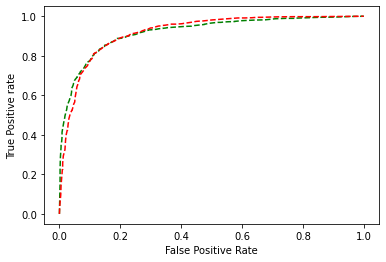

In [206]:
for i in range(n_class): 
    plt.plot(fpr[i], tpr[i], linestyle='--',color=random.choice(color)) 
 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.savefig('Multiclass ROC',dpi=300);

# Saving the best model :

In [207]:
import pickle
filename='Best_model_for_Churn.pkl'
pickle.dump(RFC,open(filename,'wb'))

# Predictions :

In [211]:
predictions=RFC.predict(x_test)

In [212]:
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [213]:
pd.DataFrame([predictions[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
1857,1,1
1858,0,0
1859,1,1
1860,0,1


Hence these are the predicted and original churn values in a dataframe.